In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt_txt='data.txt'
data=pd.read_csv(dt_txt,header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

data.columns = col_names

In [4]:
data.shape

(699, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Id,699.0,1071704.10,617095.73,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump_thickness,699.0,4.42,2.82,1.0,2.0,4.0,6.0,10.0
Uniformity_Cell_Size,699.0,3.13,3.05,1.0,1.0,1.0,5.0,10.0
Uniformity_Cell_Shape,699.0,3.21,2.97,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.81,2.86,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.22,2.21,1.0,2.0,2.0,4.0,10.0
Bland_Chromatin,699.0,3.44,2.44,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.87,3.05,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.59,1.72,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.69,0.95,2.0,2.0,2.0,4.0,4.0


In [7]:
data['Bare_Nuclei']=pd.to_numeric(data['Bare_Nuclei'],errors='coerce')

In [8]:
data.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [9]:
data.isnull().sum()

Id                              0
Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [10]:
data=data.fillna(0)

# Data Visulization

In [11]:
corr=data.corr()
corr.T

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Id,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.089871,-0.060051,-0.052072,-0.034901,-0.080226
Clump_thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.589296,0.558428,0.535835,0.350034,0.716001
Uniformity_Cell_Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.684569,0.755721,0.722865,0.458693,0.817904
Uniformity_Cell_Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.704529,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.665723,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.582904,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,-0.089871,0.589296,0.684569,0.704529,0.665723,0.582904,1.000000,0.671545,0.572054,0.342795,0.817653
Bland_Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.671545,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.572054,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342795,0.344169,0.428336,1.000000,0.423170


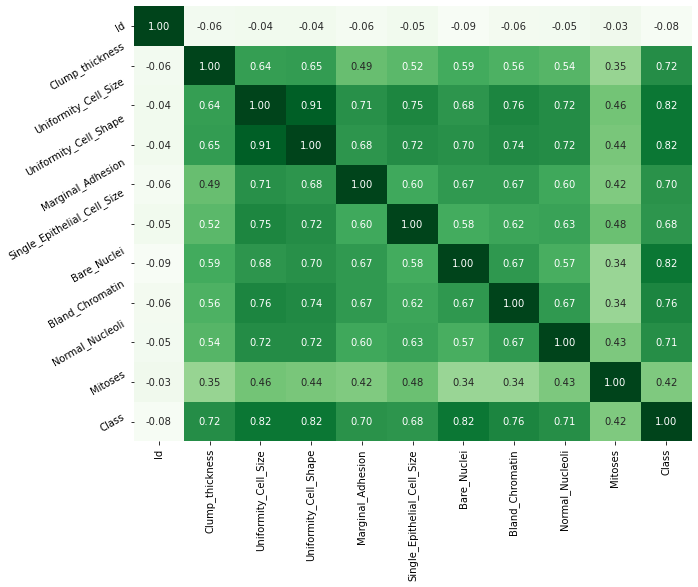

In [12]:
plt.figure(figsize=(10,8))
heat=sns.heatmap(corr, annot=True,fmt='.2f',cmap='Greens',cbar=False)
heat.set_xticklabels(heat.get_xticklabels(), rotation=90)
heat.set_yticklabels(heat.get_yticklabels(), rotation=30) 
plt.show()

<AxesSubplot:xlabel='Class', ylabel='Count'>

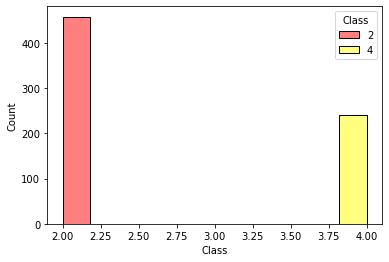

In [13]:
sns.histplot(data=data, x='Class',hue='Class',palette='autumn')

******These are Some Seaborn Plattes You can try******


‘Accent’, ‘Accent_r’, ‘Blues’, ‘Blues_r’, ‘BrBG’, ‘BrBG_r’, ‘BuGn’, ‘BuGn_r’,
‘BuPu’, ‘BuPu_r’, ‘CMRmap’, ‘CMRmap_r’, ‘Dark2’, ‘Dark2_r’, ‘GnBu’, ‘GnBu_r’,  ‘Greens’, 
‘Greens_r’, ‘Greys’, ‘Greys_r’, ‘OrRd’, ‘OrRd_r’, ‘Oranges’, ‘Oranges_r’,  ‘PRGn’, ‘PRGn_r’,
‘Paired’, ‘Paired_r’, ‘Pastel1’, ‘Pastel1_r’, ‘Pastel2’,  ‘Pastel2_r’, ‘PiYG’, ‘PiYG_r’, ‘PuBu’,
‘PuBuGn’, ‘PuBuGn_r’, ‘PuBu_r’, ‘PuOr’, ‘PuOr_r’, ‘PuRd’, ‘PuRd_r’, ‘Purples’, ‘Purples_r’, ‘RdBu’, 
‘RdBu_r’, ‘RdGy’, ‘RdGy_r’, ‘RdPu’, ‘RdPu_r’, ‘RdYlBu’, ‘RdYlBu_r’, ‘RdYlGn’, ‘RdYlGn_r’, ‘Reds’, 
‘Reds_r’, ‘Set1’, ‘Set1_r’, ‘Set2’, ‘Set2_r’, ‘Set3’, ‘Set3_r’, ‘Spectral’, ‘Spectral_r’, ‘Wistia’, 
‘Wistia_r’, ‘YlGn’, ‘YlGnBu’, ‘YlGnBu_r’, ‘YlGn_r’, ‘YlOrBr’, ‘YlOrBr_r’, ‘YlOrRd’, ‘YlOrRd_r’,
‘afmhot’, ‘afmhot_r’, ‘autumn’, ‘autumn_r’, ‘binary’, ‘binary_r’,  ‘bone’, ‘bone_r’, ‘brg’, ‘brg_r’,
‘bwr’, ‘bwr_r’, ‘cividis’, ‘cividis_r’, ‘cool’, ‘cool_r’,  ‘coolwarm’, ‘coolwarm_r’, ‘copper’, 
‘copper_r’, ‘cubehelix’, ‘cubehelix_r’, ‘flag’, ‘flag_r’,  ‘gist_earth’, ‘gist_earth_r’, ‘gist_gray’, 
‘gist_gray_r’, ‘gist_heat’, ‘gist_heat_r’, ‘gist_ncar’,  ‘gist_ncar_r’, ‘gist_rainbow’, ‘gist_rainbow_r’,
‘gist_stern’, ‘gist_stern_r’, ‘gist_yarg’,  ‘gist_yarg_r’, ‘gnuplot’, ‘gnuplot2’, ‘gnuplot2_r’, ‘gnuplot_r’, 
‘gray’, ‘gray_r’, ‘hot’, ‘hot_r’,  ‘hsv’, ‘hsv_r’, ‘icefire’, ‘icefire_r’, ‘inferno’, ‘inferno_r’, ‘jet’,
‘jet_r’, ‘magma’, ‘magma_r’,  ‘mako’, ‘mako_r’, ‘nipy_spectral’, ‘nipy_spectral_r’, ‘ocean’, ‘ocean_r’, 
‘pink’, ‘pink_r’,  ‘plasma’, ‘plasma_r’, ‘prism’, ‘prism_r’, ‘rainbow’, ‘rainbow_r’, ‘rocket’,
‘rocket_r’,  ‘seismic’, ‘seismic_r’, ‘spring’, ‘spring_r’, ‘summer’, ‘summer_r’, ‘tab10’, 
‘tab10_r’,’tab20′, ‘tab20_r’, ‘tab20b’, ‘tab20b_r’, ‘tab20c’, ‘tab20c_r’, ‘terrain’, ‘terrain_r’,
‘turbo’,  ‘turbo_r’, ‘twilight’, ‘twilight_r’, ‘twilight_shifted’, ‘twilight_shifted_r’,
‘viridis’,  ‘viridis_r’, ‘vlag’, ‘vlag_r’, ‘winter’, ‘winter_r’

In [14]:
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

# Feature Selection on X data of train and test

In [15]:
from sklearn.feature_selection import VarianceThreshold
var_thresh=VarianceThreshold(threshold=0)

In [16]:
var_thresh.fit(data)

VarianceThreshold(threshold=0)

In [17]:
var_thresh

VarianceThreshold(threshold=0)

In [18]:
var_thresh.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [19]:
const_column=[column for column in data.columns if column not in data.columns[var_thresh.get_support()]]
const_column

[]

In [20]:
# so the dataset's feature has no any zero variance.
len(const_column)

0

Model Creation

In [21]:
x=data.drop(['Class','Id'],axis=1)
y=data[['Class']]

In [22]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=.25, random_state=12345)

# scaling the x data of train and test

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()
train=scaler.fit_transform(xtrain)
test=scaler.transform(xtest)

In [25]:
col=xtrain.columns
x_train=pd.DataFrame(train, columns=[col])
x_test=pd.DataFrame(test, columns=[col])

In [26]:
x_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,1.957341,2.217234,1.955324,0.068820,1.628880,0.418618,-0.199609,0.721222,-0.340449
1,-0.851688,-0.709291,-0.755231,-0.631409,-0.117479,-0.685058,-0.603451,-0.617734,-0.340449
2,-0.851688,-0.709291,-0.755231,-0.631409,-0.554069,-0.685058,-1.007293,-0.617734,-0.340449
3,1.255084,2.217234,-0.077592,-0.281294,1.192290,0.142699,-0.199609,2.394916,-0.340449
4,-1.202816,-0.709291,-0.755231,-0.281294,-0.554069,-0.685058,-0.199609,-0.617734,-0.340449


# KNN classifier model

In [27]:
# apply model
knear=KNeighborsClassifier()
knear.fit(x_train, ytrain)

KNeighborsClassifier()

In [28]:
ypred=knear.predict(x_test)

In [29]:
# model accuracy at k=5 ------> default
accuracy=accuracy_score(ypred, ytest)
accuracy

0.9828571428571429

# Tunning of KNN model on different parameters

In [30]:
# hyper perameter the model at different parameters
from sklearn.model_selection import RandomizedSearchCV

In [31]:
parameter={'n_neighbors':[1,3,5,7,9,11,6,8],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
          'leaf_size':[10,20,30,40],
          'p':[2,3,4,5,6]}
new_mod=RandomizedSearchCV(knear,parameter)
new_mod.fit(x_train, ytrain)

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 20, 30, 40],
                                        'n_neighbors': [1, 3, 5, 7, 9, 11, 6,
                                                        8],
                                        'p': [2, 3, 4, 5, 6]})

In [32]:
accuracy_score(ypred, ytest).round(2)*100

98.0

In [33]:
new_mod.best_params_

{'p': 3, 'n_neighbors': 9, 'leaf_size': 20, 'algorithm': 'auto'}

In [34]:
ypredd=knear.predict(x_train)
accuracy_score(ypredd, ytrain).round(2)*100

97.0

# Checking the overfitting and underfitting of model

In [35]:
print('Training set score: ',accuracy_score(ypredd, ytrain))

print('Test set score: ',accuracy_score(ypred, ytest))

Training set score:  0.9713740458015268
Test set score:  0.9828571428571429


above accuracy of both model are almost in same range so there is no any concept of overfitting and underfitting in model

In [36]:
# classification report of the model on train data
print(classification_report(ypredd, ytrain))

              precision    recall  f1-score   support

           2       0.97      0.98      0.98       337
           4       0.97      0.95      0.96       187

    accuracy                           0.97       524
   macro avg       0.97      0.97      0.97       524
weighted avg       0.97      0.97      0.97       524



In [37]:
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

           2       0.98      0.99      0.99       117
           4       0.98      0.97      0.97        58

    accuracy                           0.98       175
   macro avg       0.98      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175

